In [18]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [19]:
1
path = os.getcwd()
parent = os.path.dirname(path)
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df = gpd.read_file(main_folder_path+"/data/gis/osm/roads.shp")  

In [20]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


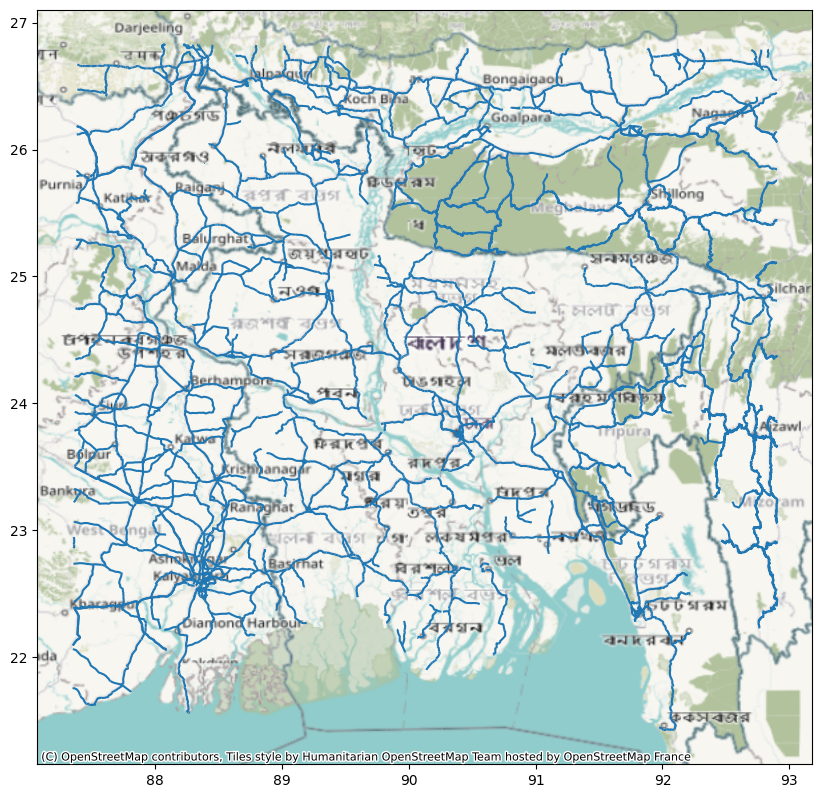

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [22]:
from shapely import wkt

In [23]:
df_sections = pd.read_csv(main_folder_path + "/data/intersections.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.1177216 23.4789438),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.3697771 23.0193604),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.5376108 23.6943608),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.5157222 23.7020556),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.443333 23.7060278),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.5214438 23.7059167),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.1076389 24.0496941),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.5616667 23.7774716),N105
8,8,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.3430552 24.1466386),N204
9,9,N2,145.041,LRP146,24.289222,91.503444,NaN,intersection,Sylhet 86 km,POINT (91.5034444 24.2892219),N207


In [25]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_sections = pd.read_csv(main_folder_path + "/data/intersections_BONUS.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections["geometry"]=df_sections["0"].apply(wkt.loads)
df_sections = gpd.GeoDataFrame(df_sections,geometry="geometry", crs="EPSG:4326").drop(columns="0")
# df_sections


FileNotFoundError: [Errno 2] No such file or directory: '/Users/milanmoleman/Desktop/EPA133a-G07-A3/data/intersections_BONUS.csv'

In [ ]:
df_sections

In [ ]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [ ]:
df_normal_data = pd.read_csv(main_folder_path + "/data/_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

In [ ]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])

intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]


In [ ]:
intersecting_N1N2.plot()

In [ ]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [ ]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]

In [ ]:

# df_used_intersects = pd.read_csv(main_folder_path+"\data\intersections.csv")
# gdf_used_intersects = gpd.GeoDataFrame(df_used_intersects, crs="EPSG:4326")

In [ ]:
df_sections

In [ ]:
shape_file_intersects = gpd.GeoSeries(Intersect_points,crs="4326")

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)

shape_file_intersects.plot(ax=ax)
df_sections.plot(ax=ax,color="yellow")

In [ ]:
df_sections

In [ ]:
from shapely.geometry import MultiPoint

In [ ]:
something = MultiPoint([(0, 0), (1, 1), (2, 2)])
isinstance(something, MultiPoint)

In [ ]:
 shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [ ]:
 # shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [ ]:

final_pair = []
for section in df_sections["geometry"]:
    min_dist = 10000
    for shape_file_intersect in shape_file_intersects.unique():
        
        # print(section,shape_file_intersect)
        if isinstance(shape_file_intersect, MultiPoint):
            for point in list(shape_file_intersect.geoms):
                dist = distance(section, point)
                if dist < min_dist:
                    min_dist = dist
                    closest_point_pair = (section,point)
                # print(LineString([point,section]))
        else:
            # print(LineString([shape_file_intersect,section]))
            dist = distance(section, shape_file_intersect)
            if dist < min_dist:
                min_dist = dist
                closest_point_pair = (section.centroid,shape_file_intersect.centroid)
    final_pair.append(closest_point_pair)

In [ ]:
final_pair

In [ ]:
for pair in final_pair:
    print(pair)

In [ ]:
import matplotlib.lines as mlines


# etc etc, nine])

In [ ]:

transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)

In [ ]:
fig,ax=plt.subplots(64,figsize=(10,10))
ax =ax.flatten()
ax_count =0
dict_length = {}
orginal = mlines.Line2D([], [], color='red', marker='s', ls='', label='Csv data')
shapefile = mlines.Line2D([], [], color='blue', marker='D', ls='', label='Shapefile data')

for index, pair in enumerate(final_pair):
    line = LineString([pair[0],pair[1]])
    line_length= sp_ops.transform(transformer.transform ,line).length
    print(line_length)
    gpd.GeoSeries(pair[0],crs="EPSG:4326").plot(ax=ax[index],color="red")
    gpd.GeoSeries(pair[1],crs="EPSG:4326").plot(ax=ax[index],color="blue")
    gpd.GeoSeries(line,crs   ="EPSG:4326").plot(ax=ax[index],color="white")
    gpd.GeoSeries(buffer(line.centroid,0.03),crs   ="EPSG:4326").plot(ax=ax[index],color="pink",alpha=0)
    cx.add_basemap(ax=ax[index],crs="EPSG:4326",attribution_size=0) 
    if index == 8:
        ax[index].legend(handles=[orginal, shapefile],loc="lower center",bbox_to_anchor=(0.0, -0.4, 0.0, 0.0))
    ax[index].title.set_text((df_sections["Unnamed: 0"][0],f"{int(line_length)} m"))
    ax_count =ax_count+1
    dict_length[df_sections["Unnamed: 0"][index]]=line_length/1000
plt.show() 
    

In [ ]:
dict_length

In [ ]:
plt.bar(dict_length.keys(), dict_length.values(),color="red")
plt.xlabel("Road to which the N1 or N2 connects")
plt.ylabel("Difference in kilometers")
plt.title("Difference intersections shapefile and csv", fontsize = 14)

In [ ]:
df_length  = pd.DataFrame.from_dict(dict_length,orient=dict_length.keys())

In [ ]:
shape_file_intersects

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [ ]:
# main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
# df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")
# 
# gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
# 
# from shapely import buffer
# lines = []
# for name in ["N1","N2"]:
#     gdf_temp = gdf_normal[gdf_normal["road"]==name]
#     line = buffer(LineString(gdf_temp["geometry"]),0.1)
#     lines.append(line)